In [362]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 

* TRAINING DATA & TESTING DATA

In [363]:
df_train = pd.read_csv("titanictrain.csv",delimiter=",")
df_test = pd.read_csv("titanictest.csv", delimiter=",")

* DATA OVERVIEW

In [364]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [365]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [366]:
df_train.Age.fillna(df_train.Age.mean(),inplace=True)

In [367]:
df_train.Age.unique()

array([22.        , 38.        , 26.        , 35.        , 29.69911765,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 31.        ,
       34.        , 15.        , 28.        ,  8.        , 19.        ,
       40.        , 66.        , 42.        , 21.        , 18.        ,
        3.        ,  7.        , 49.        , 29.        , 65.        ,
       28.5       ,  5.        , 11.        , 45.        , 17.        ,
       32.        , 16.        , 25.        ,  0.83      , 30.        ,
       33.        , 23.        , 24.        , 46.        , 59.        ,
       71.        , 37.        , 47.        , 14.5       , 70.5       ,
       32.5       , 12.        ,  9.        , 36.5       , 51.        ,
       55.5       , 40.5       , 44.        ,  1.        , 61.        ,
       56.        , 50.        , 36.        , 45.5       , 20.5       ,
       62.        , 41.        , 52.        , 63.        , 23.5 

In [368]:
df_train["Age"] = df_train.Age.astype(int)
df_train["Age"].dtype

dtype('int32')

* Cabin

In [369]:
df_train.Cabin.unique() 

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [370]:
df_train.Cabin.fillna(df_train.Cabin.value_counts().idxmax(),inplace=True)

In [371]:
df_train.Cabin.unique()

array(['B96 B98', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'E10', 'E44', 'A34',
       'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37',
       'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39',
       'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41',
       'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58',
       'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24

* Embarked

In [372]:
df_train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [373]:
df_train.Embarked.fillna(df_train.Embarked.value_counts().idxmax(),inplace=True)

In [374]:
df_train.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [375]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null int32
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(1), int32(1), int64(5), object(5)
memory usage: 80.2+ KB


In [376]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,B96 B98,S


* TESTING DATA 

In [377]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

* Age

In [378]:
df_test.Age.fillna(df_test.Age.mean(),inplace=True)

* Cabin

In [379]:
df_test.Cabin.fillna(df_train.Cabin.value_counts().idxmax(),inplace=True)

* Fare

In [380]:
df_test.Fare.fillna(df_test.Fare.interpolate(),inplace=True)

In [381]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          418 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [382]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,B96 B98,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,B96 B98,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,B96 B98,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,B96 B98,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,B96 B98,S


##### DATA VISUALIZATION

In [383]:
df_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033741,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.067809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.335071,0.083081,0.018443,-0.549500
Age,0.033741,-0.067809,-0.335071,1.000000,-0.232743,-0.176744,0.093856
SibSp,-0.057527,-0.035322,0.083081,-0.232743,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.176744,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.093856,0.159651,0.216225,1.000000


<AxesSubplot:>

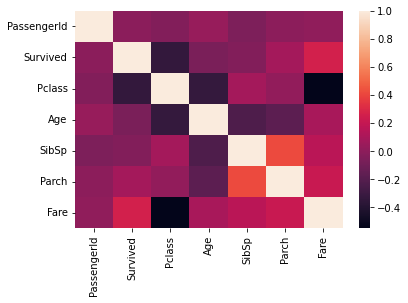

In [384]:
sns.heatmap(df_train.corr())

### DATA MANIPULATION

In [385]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,B96 B98,S


In [386]:
df_train.Sex = df_train.Sex.map({"male": 1, "female":0}).astype(int)

#### Setting up input and target

In [387]:
y = df_train.Survived

In [388]:
x = df_train.drop(columns=["Name","Ticket","Cabin","Embarked","Survived"],axis=0)

In [389]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int32
Age            891 non-null int32
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
dtypes: float64(1), int32(2), int64(4)
memory usage: 41.9 KB


In [390]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

##### SPLITTING THE DATA INTO TRAINING AND TESTING 

In [391]:
from sklearn.model_selection import train_test_split

In [392]:
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=42)

In [393]:
print(len(x_train))
print(len(y_train))

712
712


In [394]:
print(x_train.shape)
print(y_train.shape)

(712, 7)
(712,)


In [395]:
print(len(x_test))
print(len(y_test))

179
179


In [396]:
print(x_test.shape)
print(y_test.shape)

(179, 7)
(179,)


##### Dealing with df_test

In [397]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          418 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [398]:
df_test.Sex = df_test["Sex"].map({"male":1,"female":0}).astype(int)

In [399]:
x_sample = df_test.drop(columns=["Name","Embarked","Ticket","Cabin"],axis=0)

In [400]:
x_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int32
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 21.4 KB


#### DEPLOYING MODEL TO TRAIN THE DATA 
* LogisticRegression

In [401]:
from sklearn.linear_model import LogisticRegression

In [402]:
model1 = LogisticRegression()

In [403]:
model1.fit(x_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

#### Prediction with the model

In [404]:
y_pred=model1.predict(x_sample)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

###### TRAINING ACCURACY
* Aim to measure the accuracy of the model deployed on training data 

In [405]:
model1.score(x_train,y_train)

0.7963483146067416

###### VALIDATION ACCURACY
* Aim is to measure the accuracy of the model deployed on testing data

In [406]:
model1.score(x_test,y_test) 

0.7877094972067039

In [407]:
df_test["Survived"] = y_pred

##### VISUALIZING THE PREDICTED SURVIVED OF TITANIC DATA 
* 0: not survived
* 1 : survived

In [408]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",1,34.50000,0,0,330911,7.8292,B96 B98,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.00000,1,0,363272,7.0000,B96 B98,S,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.00000,0,0,240276,9.6875,B96 B98,Q,0
3,895,3,"Wirz, Mr. Albert",1,27.00000,0,0,315154,8.6625,B96 B98,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.00000,1,1,3101298,12.2875,B96 B98,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,30.27259,0,0,A.5. 3236,8.0500,B96 B98,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.00000,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,B96 B98,S,0
416,1308,3,"Ware, Mr. Frederick",1,30.27259,0,0,359309,8.0500,B96 B98,S,0


* THE NUMBER OF FEMALES THAT SURVIVED 

In [409]:
df_test[(df_test["Sex"]== 0) & (df_test["Survived"]==1)]  

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.00000,1,1,3101298,12.2875,B96 B98,S,1
6,898,3,"Connolly, Miss. Kate",0,30.00000,0,0,330972,7.6292,B96 B98,Q,1
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,18.00000,0,0,2657,7.2292,B96 B98,C,1
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",0,23.00000,1,0,21228,82.2667,B45,S,1
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",0,47.00000,1,0,W.E.P. 5734,61.1750,E31,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
409,1301,3,"Peacock, Miss. Treasteall",0,3.00000,1,1,SOTON/O.Q. 3101315,13.7750,B96 B98,S,1
410,1302,3,"Naughton, Miss. Hannah",0,30.27259,0,0,365237,7.7500,B96 B98,Q,1
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",0,37.00000,1,0,19928,90.0000,C78,Q,1
412,1304,3,"Henriksson, Miss. Jenny Lovisa",0,28.00000,0,0,347086,7.7750,B96 B98,S,1


* NUMBER OF MALE THAT SURVIVED 

In [410]:
df_test[(df_test["Sex"]==1) & (df_test["Survived"]==1)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
23,915,1,"Williams, Mr. Richard Norris II",1,21.00000,0,1,PC 17597,61.3792,B96 B98,C,1
41,933,1,"Franklin, Mr. Thomas Parham",1,30.27259,0,0,113778,26.5500,D34,S,1
64,956,1,"Ryerson, Master. John Borie",1,13.00000,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,1
73,965,1,"Ovies y Rodriguez, Mr. Servando",1,28.50000,0,0,PC 17562,27.7208,D43,C,1
75,967,1,"Keeping, Mr. Edwin",1,32.50000,0,0,113503,211.5000,C132,C,1
94,986,1,"Birnbaum, Mr. Jakob",1,25.00000,0,0,13905,26.0000,B96 B98,C,1
118,1010,1,"Beattie, Mr. Thomson",1,36.00000,0,0,13050,75.2417,C6,C,1
146,1038,1,"Hilliard, Mr. Herbert Henry",1,30.27259,0,0,17463,51.8625,E46,S,1
148,1040,1,"Crafton, Mr. John Bertram",1,30.27259,0,0,113791,26.5500,B96 B98,S,1
191,1083,1,"Salomon, Mr. Abraham L",1,30.27259,0,0,111163,26.0000,B96 B98,S,1


In [411]:
No_of_Survived = len([x for x in y_pred if x == 1])

In [412]:
No_of_Survived

168

In [413]:
No_of_Perish = len([x for x in y_pred if x ==0])

In [414]:
No_of_Perish

250

##### MODEL 2
* RANDOM FOREST classifier

In [415]:
from sklearn.ensemble import RandomForestClassifier

In [416]:
model2 = RandomForestClassifier()

In [417]:
clf = RandomForestClassifier(max_depth=2, random_state=2)

In [418]:
clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=2, random_state=2)

In [419]:
prediction=clf.predict(x_sample)
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [420]:
clf.score(x_train,y_train)

0.8146067415730337

In [421]:
clf.score(x_test,y_test)

0.776536312849162

In [422]:
df_test["Survived2"] = prediction

In [423]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Survived2
0,892,3,"Kelly, Mr. James",1,34.50000,0,0,330911,7.8292,B96 B98,Q,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.00000,1,0,363272,7.0000,B96 B98,S,0,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.00000,0,0,240276,9.6875,B96 B98,Q,0,0
3,895,3,"Wirz, Mr. Albert",1,27.00000,0,0,315154,8.6625,B96 B98,S,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.00000,1,1,3101298,12.2875,B96 B98,S,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,30.27259,0,0,A.5. 3236,8.0500,B96 B98,S,0,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.00000,0,0,PC 17758,108.9000,C105,C,1,1
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,B96 B98,S,0,0
416,1308,3,"Ware, Mr. Frederick",1,30.27259,0,0,359309,8.0500,B96 B98,S,0,0


* LogisticRegression perform better than Randomforest(which is assemble of decision tree algorithm)

##### MODEL 3
* NEURAL NETWORK 

In [424]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import tf
from keras.utils import np_utils

In [425]:
model3 = Sequential()
model3.add(Dense(units=600, activation="sigmoid",input_shape=(7,)))
model3.add(Dropout(0.2))
model3.add(Dense(units=80, activation="sigmoid"))
model3.add(Dropout(0.2))
model3.add(Dense(units=80, activation="sigmoid"))
model3.add(Flatten())
model3.add(Dense(units=1, activation="sigmoid"))

In [426]:
model3.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])

In [427]:
epoch_range = 10

In [428]:
history3 = model3.fit(x_train,y_train,epochs=epoch_range,validation_data=(x_test,y_test))
history3

Epoch 1/10
23/23 [==============================] - 2s 25ms/step - loss: 0.6677 - accuracy: 0.6264 - val_loss: 0.6654 - val_accuracy: 0.5866
Epoch 2/10
23/23 [==============================] - 0s 18ms/step - loss: 0.6545 - accuracy: 0.6348 - val_loss: 0.6500 - val_accuracy: 0.6313
Epoch 3/10
23/23 [==============================] - 0s 15ms/step - loss: 0.6387 - accuracy: 0.6320 - val_loss: 0.6377 - val_accuracy: 0.5978
Epoch 4/10
23/23 [==============================] - 0s 17ms/step - loss: 0.6304 - accuracy: 0.6573 - val_loss: 0.6502 - val_accuracy: 0.6257
Epoch 5/10
23/23 [==============================] - 0s 15ms/step - loss: 0.6266 - accuracy: 0.6629 - val_loss: 0.5923 - val_accuracy: 0.6983
Epoch 6/10
23/23 [==============================] - 0s 15ms/step - loss: 0.6159 - accuracy: 0.6699 - val_loss: 0.6038 - val_accuracy: 0.6816
Epoch 7/10
23/23 [==============================] - 0s 16ms/step - loss: 0.6179 - accuracy: 0.6756 - val_loss: 0.6200 - val_accuracy: 0.6704
Epoch 8/10
23

In [429]:
acc = history3.history["accuracy"]
val_acc = history3.history["val_accuracy"]

loss = history3.history["loss"]
val_loss = history3.history["val_loss"]

In [430]:
def plot_graph(validation_data, training_data, graph_type):
    plt.clf()
    plt.figure(figsize=(6,6))
    epochs = range(1, len(training_data) + 1)
    plt.plot(epochs, training_data, 'g', label='Training '+graph_type)
    plt.plot(epochs, validation_data, 'b', label='Validation '+graph_type)
    plt.title('Training and validation '+graph_type)
    plt.xlabel('Epochs')
    plt.ylabel(graph_type)
    plt.legend()
    plt.show()


<Figure size 432x288 with 0 Axes>

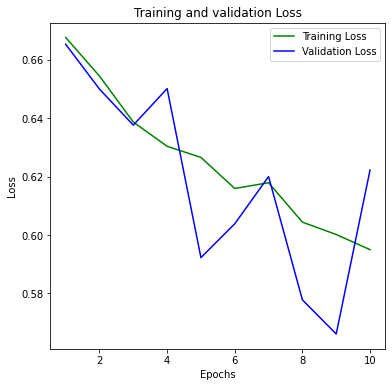

<Figure size 432x288 with 0 Axes>

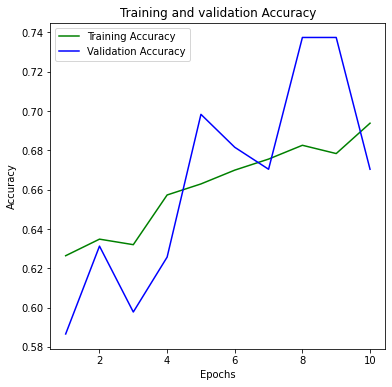

In [431]:
plot_graph(history3.history['val_loss'], history3.history['loss'], 'Loss')
plot_graph(history3.history['val_accuracy'], history3.history['accuracy'], 'Accuracy') 

In [432]:
model3.predict(x_sample)

array([[0.17229646],
       [0.16871145],
       [0.16672364],
       [0.17758182],
       [0.1912491 ],
       [0.19125044],
       [0.17710793],
       [0.22448537],
       [0.18711719],
       [0.21357605],
       [0.1745733 ],
       [0.19299784],
       [0.54302645],
       [0.18207231],
       [0.33817732],
       [0.23093057],
       [0.17719394],
       [0.18043372],
       [0.17879325],
       [0.16985777],
       [0.30079913],
       [0.18737045],
       [0.23676997],
       [0.41521895],
       [0.715878  ],
       [0.17154229],
       [0.43252552],
       [0.17915294],
       [0.2084811 ],
       [0.19387385],
       [0.18739527],
       [0.23254013],
       [0.19616002],
       [0.20629653],
       [0.3449954 ],
       [0.18264946],
       [0.17730808],
       [0.18594256],
       [0.18006602],
       [0.33316648],
       [0.17605281],
       [0.21029356],
       [0.16974068],
       [0.1849105 ],
       [0.29013008],
       [0.1780591 ],
       [0.20123908],
       [0.174

* NEURAL NETWORK IS NOT GOOD FOR TITANIC MODEL

##### SUGGESTED SOLUTION 
* ADD MORE DATA TO Training data 

In [433]:
from imblearn.over_sampling import SMOTE

In [434]:
## SMOTE
sm = SMOTE(random_state = 2)
x_train_res, y_train_res = sm.fit_resample(x, y.ravel())

In [435]:
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y == 0)))

Before OverSampling, counts of label '1': 342
Before OverSampling, counts of label '0': 549 



In [436]:
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

After OverSampling, the shape of train_X: (1098, 7)
After OverSampling, the shape of train_y: (1098,) 



In [437]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

After OverSampling, counts of label '1': 549
After OverSampling, counts of label '0': 549


###### FEEDING THE MODEL WITH MORE DATA
* to improve the model accuracy 

In [438]:
model4 = Sequential()
model4.add(Dense(units=900, activation="sigmoid",input_shape=(7,)))
model4.add(Dropout(0.2))
model4.add(Dense(units=350, activation="sigmoid"))
model4.add(Dropout(0.2))
model4.add(Dense(units=350, activation="sigmoid"))
model4.add(Flatten())
model4.add(Dense(units=1, activation="sigmoid"))

In [439]:
model4.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])

In [440]:
history4 = model4.fit(x_train_res,y_train_res,epochs=epoch_range,validation_data=(x_test,y_test))

Epoch 1/10
35/35 [==============================] - 5s 44ms/step - loss: 0.7007 - accuracy: 0.5228 - val_loss: 0.6392 - val_accuracy: 0.6034
Epoch 2/10
35/35 [==============================] - 1s 19ms/step - loss: 0.6685 - accuracy: 0.5820 - val_loss: 0.6156 - val_accuracy: 0.7263
Epoch 3/10
35/35 [==============================] - 1s 17ms/step - loss: 0.6344 - accuracy: 0.6503 - val_loss: 0.7406 - val_accuracy: 0.4302
Epoch 4/10
35/35 [==============================] - 1s 18ms/step - loss: 0.6365 - accuracy: 0.6521 - val_loss: 0.5581 - val_accuracy: 0.7486
Epoch 5/10
35/35 [==============================] - 1s 16ms/step - loss: 0.6309 - accuracy: 0.6403 - val_loss: 0.5791 - val_accuracy: 0.7263
Epoch 6/10
35/35 [==============================] - 1s 16ms/step - loss: 0.6200 - accuracy: 0.6639 - val_loss: 0.5471 - val_accuracy: 0.7486
Epoch 7/10
35/35 [==============================] - 0s 13ms/step - loss: 0.6204 - accuracy: 0.6457 - val_loss: 0.5969 - val_accuracy: 0.6983
Epoch 8/10
35

* DATA AUGEMENTATION HAS REALLY IMPROVE THE MODEL AS VALIDATION ACCURACY INCREASE DRASTICALLY

In [441]:
acc = history4.history["accuracy"]
val_acc = history4.history["val_accuracy"]

loss = history4.history["loss"]
val_loss = history4.history["val_loss"]

<Figure size 432x288 with 0 Axes>

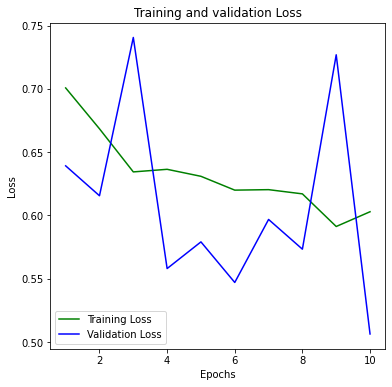

<Figure size 432x288 with 0 Axes>

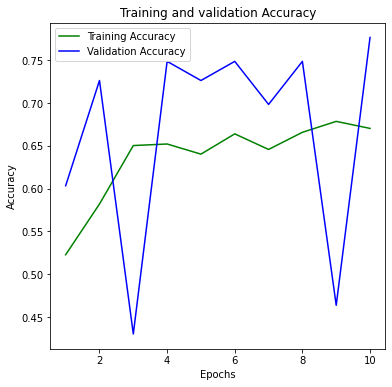

In [442]:
plot_graph(history4.history['val_loss'], history4.history['loss'], 'Loss')
plot_graph(history4.history['val_accuracy'], history4.history['accuracy'], 'Accuracy')

In [447]:
predicts=model4.predict(x_sample)
predicts

array([[0.21555698],
       [0.2037273 ],
       [0.20605046],
       [0.23854575],
       [0.30171514],
       [0.30100963],
       [0.25094855],
       [0.46336862],
       [0.30226284],
       [0.38020533],
       [0.22473606],
       [0.36406314],
       [0.90613663],
       [0.30519462],
       [0.79893315],
       [0.5351507 ],
       [0.24557811],
       [0.25001696],
       [0.24539712],
       [0.21514833],
       [0.71439   ],
       [0.27323514],
       [0.61068135],
       [0.8533741 ],
       [0.9205837 ],
       [0.21848264],
       [0.8728746 ],
       [0.24413571],
       [0.44696254],
       [0.298334  ],
       [0.31484044],
       [0.48015347],
       [0.33640075],
       [0.3896197 ],
       [0.7979872 ],
       [0.2602738 ],
       [0.2516825 ],
       [0.29794657],
       [0.24986371],
       [0.7977849 ],
       [0.23511237],
       [0.44648919],
       [0.20416293],
       [0.3042215 ],
       [0.7425738 ],
       [0.23939615],
       [0.41034478],
       [0.223

In [448]:
survived = [x for x in predicts if x >= 0.5]

In [449]:
len(survived)

108

In [450]:
not_survived = [x for x in predicts if x < 0.5]

In [451]:
len(not_survived)

310

### Finally i can say neural network does not work perfectly for titnaic model.
* Reason: Not enough feature of training data to use 
* Reason: Default hyper-paramter in NNs perform so weak as compare to decision tree. 
* Check link https://datascience.stackexchange.com/questions/38328/when-does-decision-tree-perform-better-than-the-neural-network